In [764]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy import fft
from numpy import matlib as matlab

### Gerado dois sinais ed(n) e eη(n), ruídos gaussianos, descorrelacionados, com média nula e variâncias σ²ed = 1 e σ²eη = 0.5, respectivamente e mostrado nos gráficos abaixo.

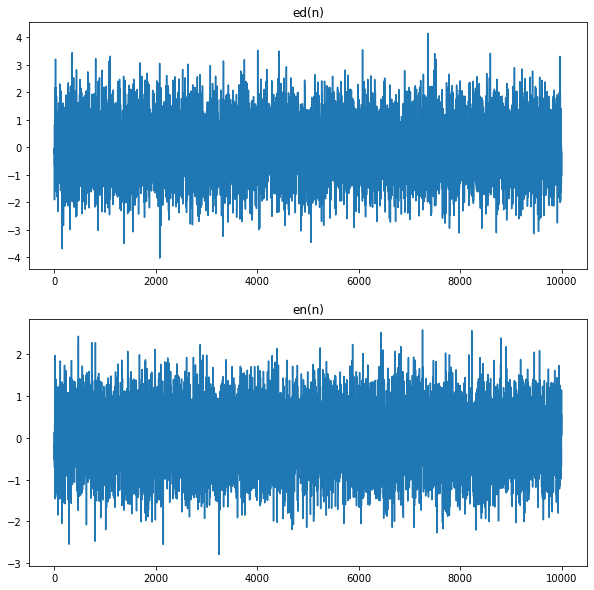

In [765]:
ed = np.random.randn(10000)
en = np.sqrt(0.5)*np.random.randn(10000)
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('ed(n)')
plt.plot(ed)
plt.subplot(212)
plt.title('en(n)')
plt.plot(en)
plt.show()

### Os sinais acima foram utilizados para gerar um sinal aleatório d(n) = ed(n) + 0.8ed(n − 1) + 0.2ed(n − 2), como mostrado nos gráficos abaixo.

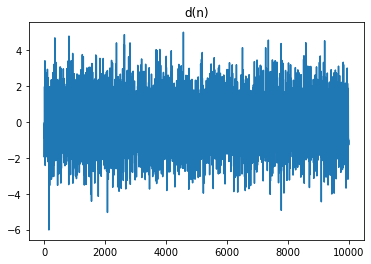

In [766]:
d = signal.lfilter([1, 0.8, 0.2],1,ed)
plt.plot(d)
plt.title('d(n)')
plt.show()

### η(n) = −0, 94η(n − 1) − 0.64η(n − 2) +η (n)

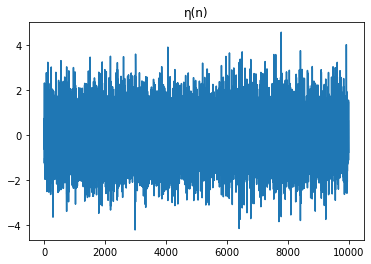

In [767]:
eta = signal.lfilter([1],[1, 0.94, 0.64],en)
plt.plot(eta)
plt.title('η(n)')
plt.show()

### A função de autocorrelação de d(n)

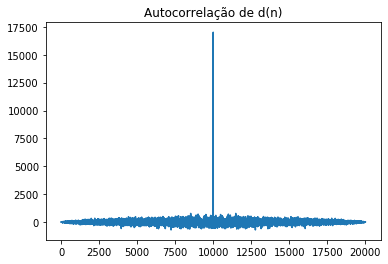

In [768]:
dcorr = signal.correlate(d,d)
plt.plot(dcorr)
plt.title('Autocorrelação de d(n)')
plt.show()

### A função de autocorrelação de η(n)

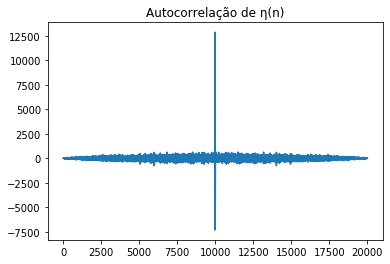

In [769]:
etacorr = signal.correlate(eta,eta)
plt.plot(etacorr)
plt.title('Autocorrelação de η(n)')
plt.show()

### A função de autocorrelação de x(n)

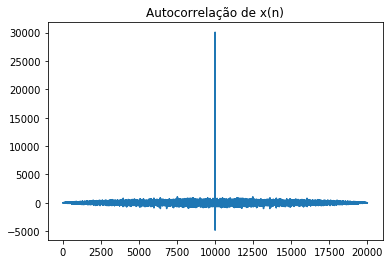

In [770]:
x = d + eta
xcorr = signal.correlate(x,x)
plt.plot(xcorr)
plt.title('Autocorrelação de x(n)')
plt.show()

### A densidade espectral do sinal d(n)

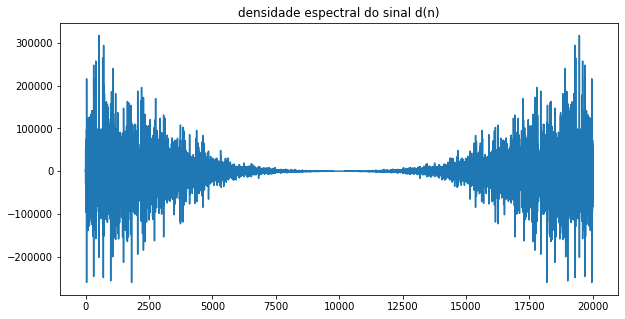

In [771]:
plt.figure(figsize=(10,5))
densidade_dcorr = fft.fft(dcorr)
plt.plot(densidade_dcorr)
plt.title('densidade espectral do sinal d(n)')
plt.show()

### A densidade espectral do sinal η(n)

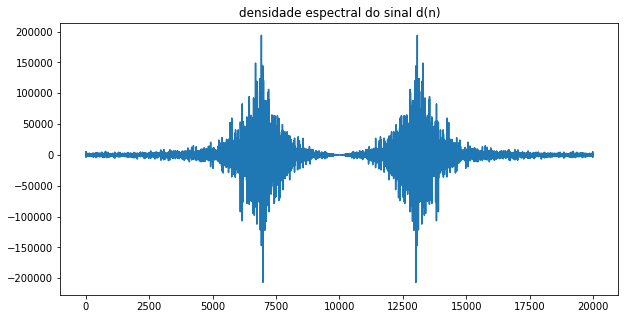

In [772]:
plt.figure(figsize=(10,5))
densidade_eta = fft.fft(etacorr)
plt.plot(densidade_eta)
plt.title('densidade espectral do sinal d(n)')
plt.show()

###  d(n) e η(n) em um mesmo gráfico

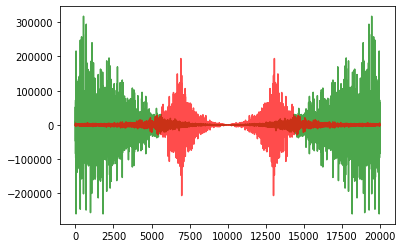

In [773]:
plt.plot(densidade_dcorr, 'g',densidade_eta, 'r', alpha = 0.7)
plt.show()

### O sinal desejado é o d(n) 

C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


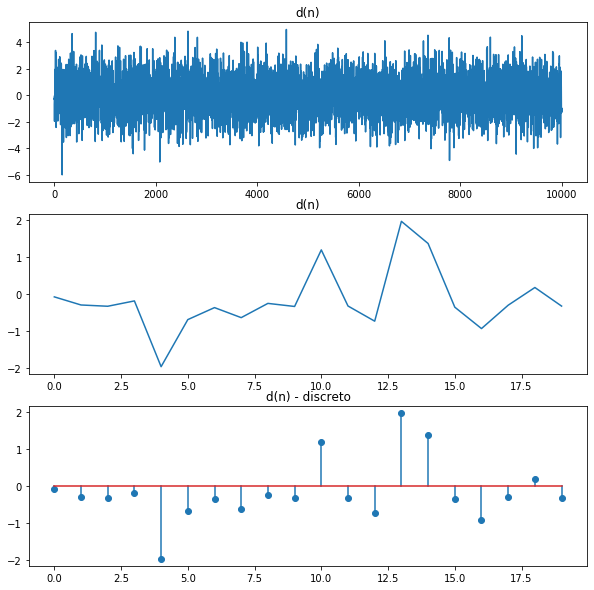

In [774]:
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.title('d(n)')
plt.plot(d)
plt.subplot(312)
plt.title('d(n)')
plt.plot(d[0:20])
plt.subplot(313)
plt.title('d(n) - discreto')
plt.stem(d[0:20])
plt.show()

### O sinal d(n) é corrompido por um ruído, η(n)

C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


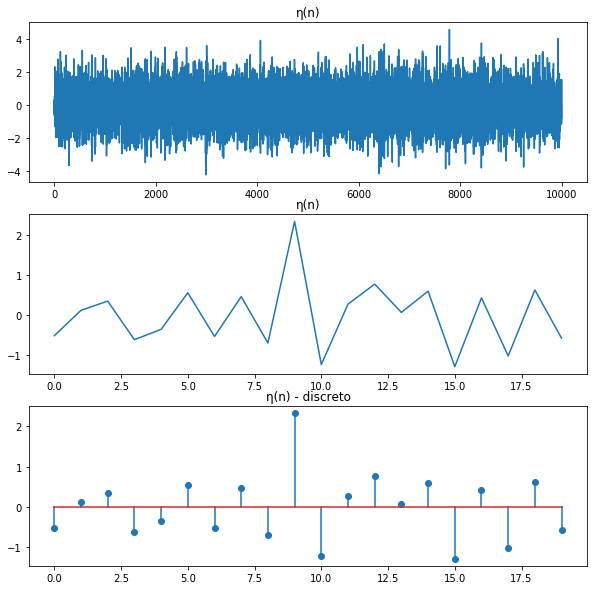

In [775]:
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.title('η(n)')
plt.plot(eta)
plt.subplot(312)
plt.title('η(n)')
plt.plot(eta[0:20])
plt.subplot(313)
plt.title('η(n) - discreto')
plt.stem(eta[0:20])
plt.show()

### O sinal de x(n)

C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


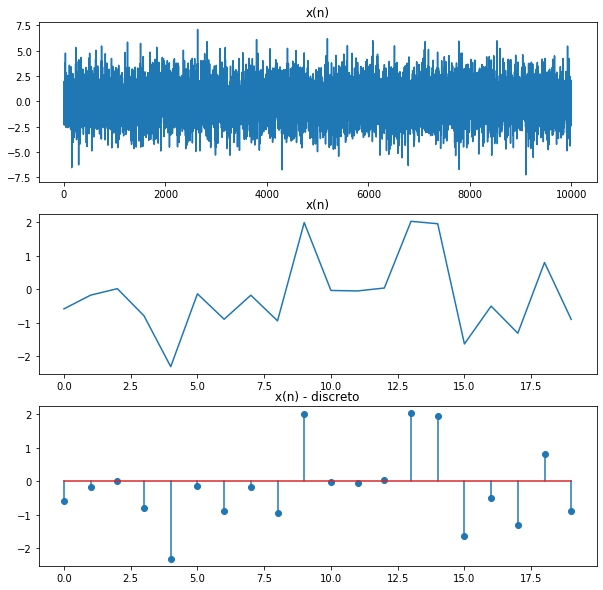

In [776]:
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.title('x(n)')
plt.plot(x)
plt.subplot(312)
plt.title('x(n)')
plt.plot(x[0:20])
plt.subplot(313)
plt.title('x(n) - discreto')
plt.stem(x[0:20])
plt.show()

### O sinal d(n), η(n), x(n)

C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly i

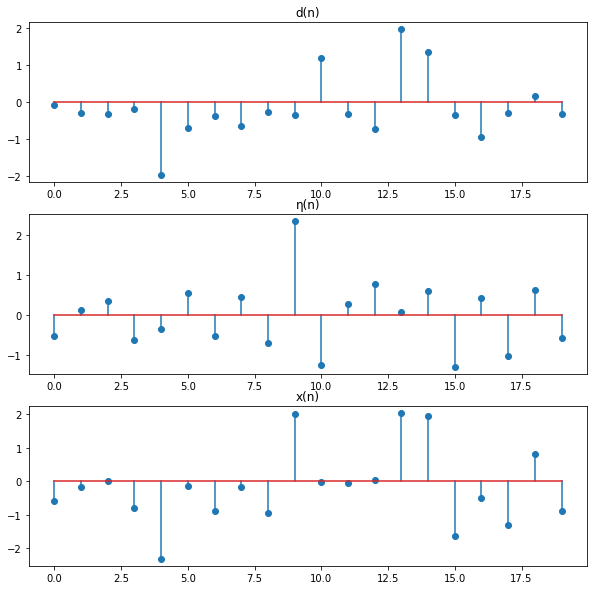

In [777]:
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.title('d(n)')
plt.stem(d[0:20])
plt.subplot(312)
plt.title('η(n)')
plt.stem(eta[0:20])
plt.subplot(313)
plt.title('x(n)')
plt.stem(x[0:20])
plt.show()

### Estimar os coeficientes do filtro de wiener

In [778]:
n_samples = 10000

### Para um coeficiente de wiener

In [779]:
n_coeficiente = 1

In [780]:
X = matlab.repmat(x.transpose(), n_coeficiente, 1)

for i in np.arange(0, n_coeficiente): 
  X[i][:] = np.roll(X[i][:], [0, i-n_coeficiente+1])

X = X[:, 0:np.size(X, 1)-n_coeficiente+1]

d_x = d[n_coeficiente-1:d.size]

R = np.dot(X, X.transpose())/(n_samples-n_coeficiente+1)
p = np.dot(X, d_x)/(n_samples-n_coeffs+1)
wiener = np.dot(np.linalg.inv(R), p)

print(wiener)

[0.56989482]


### O sinal desejado d(n) em coparação com y(n)

C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


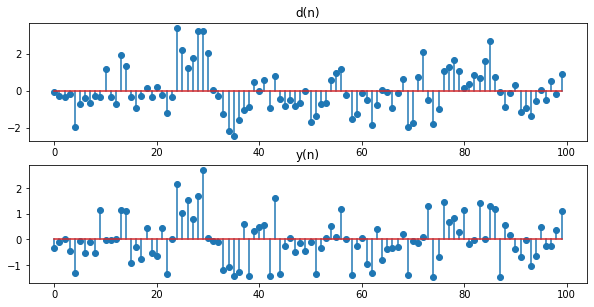

In [781]:
y = lfilter(wiener, 1.0, x, axis = 0)
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.title('d(n)')
plt.stem(d[0:100])
plt.subplot(412)
plt.title('y(n)')
plt.stem(y[0:100])
plt.show()

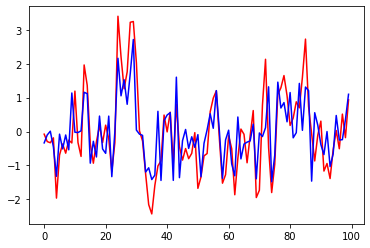

In [782]:
plt.plot(d[:100], 'r', y[:100], 'b')
plt.show()

### Para dois coeficientes de wiener

In [783]:
n_coeficiente = 2

In [784]:
X = matlab.repmat(x.transpose(), n_coeficiente, 1)

for i in np.arange(0, n_coeficiente): 
  X[i][:] = np.roll(X[i][:], [0, i-n_coeficiente+1])

X = X[:, 0:np.size(X, 1)-n_coeficiente+1]

d_x = d[n_coeficiente-1:d.size]

R = np.dot(X, X.transpose())/(n_samples-n_coeficiente+1)
p = np.dot(X, d_x)/(n_samples-n_coeffs+1)
wiener = np.dot(np.linalg.inv(R), p)

print(wiener)

[0.54739818 0.28126481]


### O sinal desejado d(n) em coparação com y(n)

C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


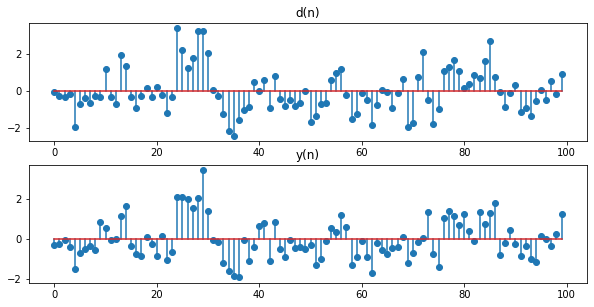

In [785]:
y = lfilter(wiener, 1.0, x, axis = 0)
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.title('d(n)')
plt.stem(d[0:100])
plt.subplot(412)
plt.title('y(n)')
plt.stem(y[0:100])
plt.show()

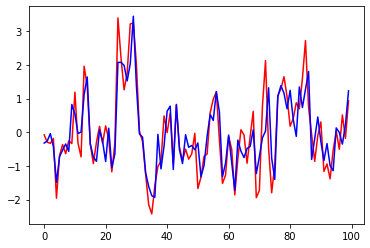

In [786]:
plt.plot(d[:100], 'r', y[:100], 'b')
plt.show()

### Para cinco coeficientes de wiener

In [787]:
n_coeficiente = 5

In [788]:
X = matlab.repmat(x.transpose(), n_coeficiente, 1)

for i in np.arange(0, n_coeficiente): 
  X[i][:] = np.roll(X[i][:], [0, i-n_coeficiente+1])

X = X[:, 0:np.size(X, 1)-n_coeficiente+1]

d_x = d[n_coeficiente-1:d.size]

R = np.dot(X, X.transpose())/(n_samples-n_coeficiente+1)
p = np.dot(X, d_x)/(n_samples-n_coeffs+1)
wiener = np.dot(np.linalg.inv(R), p)

print(wiener)

[ 0.58337325  0.26693015  0.04686102 -0.13132764  0.04981985]


### O sinal desejado d(n) em coparação com y(n)

C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


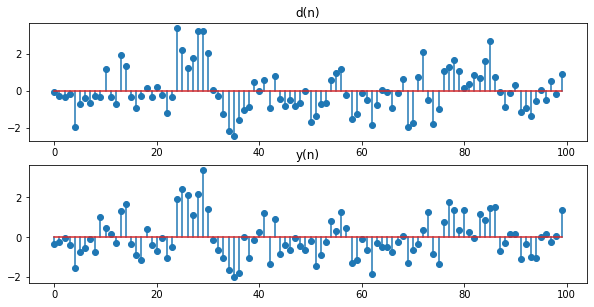

In [789]:
y = lfilter(wiener, 1.0, x, axis = 0)
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.title('d(n)')
plt.stem(d[0:100])
plt.subplot(412)
plt.title('y(n)')
plt.stem(y[0:100])
plt.show()

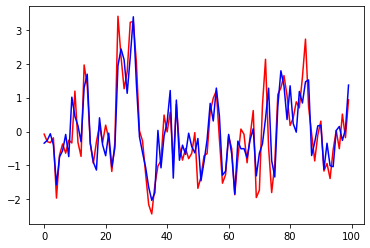

In [790]:
plt.plot(d[:100], 'r', y[:100], 'b')
plt.show()

### Para vinte coeficientes de wiener

In [791]:
n_coeficiente = 20

In [792]:
X = matlab.repmat(x.transpose(), n_coeficiente, 1)

for i in np.arange(0, n_coeficiente): 
  X[i][:] = np.roll(X[i][:], [0, i-n_coeficiente+1])

X = X[:, 0:np.size(X, 1)-n_coeficiente+1]

d_x = d[n_coeficiente-1:d.size]

R = np.dot(X, X.transpose())/(n_samples-n_coeficiente+1)
p = np.dot(X, d_x)/(n_samples-n_coeffs+1)
wiener = np.dot(np.linalg.inv(R), p)

print(wiener)

[ 5.81782535e-01  2.74431125e-01  3.43606894e-02 -1.26581140e-01
  5.01641637e-02  2.74695957e-02 -2.47802449e-02 -1.26318338e-03
  1.35738207e-02 -9.63318941e-03 -8.05179514e-03  2.94913813e-03
  5.80921355e-04 -4.75320266e-03  2.02776149e-03 -7.03429862e-03
  3.31070718e-03  2.38637418e-03  6.81147977e-03 -6.11489568e-03]


### O sinal desejado d(n) em coparação com y(n)

C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


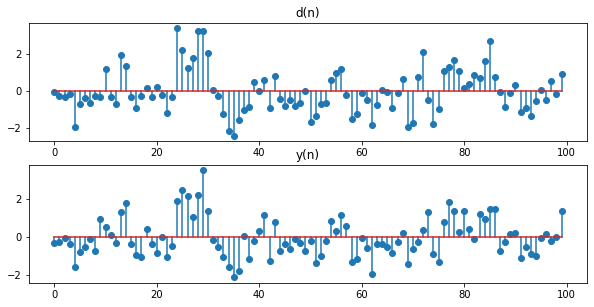

In [793]:
y = lfilter(wiener, 1.0, x, axis = 0)
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.title('d(n)')
plt.stem(d[0:100])
plt.subplot(412)
plt.title('y(n)')
plt.stem(y[0:100])
plt.show()

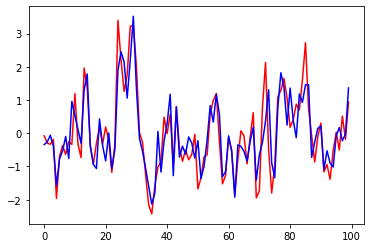

In [794]:
plt.plot(d[:100], 'r', y[:100], 'b')
plt.show()

### Parte II

In [805]:
R_xx = np.array([[1.36, 0.6], [0.6, 1.36]])
pdx = np.array([1,0])
pdx

array([1, 0])

In [806]:
R_xx_inv = np.linalg.inv(R_xx)

In [807]:
w = np.dot(R_xx_inv, pdx)
w

array([ 0.91299678, -0.4027927 ])